### Goal

In this notebook, we calculate interspike intervals (ISIs) and Coefficient of variation (CV) of spike trains. This is useful for quantifying how variable (i.e. regular vs irregular) a spike train is.

In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

from brainbox import spiking

%load_ext autoreload
%autoreload 2

In [2]:
# Let's generate some synthetic spike data
def generate_spikes(b, n, t_len):
    torch.manual_seed(20)
    example_spikes = torch.rand(b, n, t_len)
    example_spikes[example_spikes > 0.99] = 1
    example_spikes[example_spikes < 1] = 0
    
    return example_spikes

spike_trains = generate_spikes(1, n=100, t_len=1000)  # of shape b x n x t

In [3]:
# Calculate isi tensor - the distance between consecutive spikes
isi_tensor = spiking.compute_isis_tensor(spike_trains)  # of shape b x n x t

In [4]:
# Calculate CV - defined as the ratio between the standard deviation and the mean of the ISIs
cv_tensor = spiking.compute_isi_cvs(isi_tensor, n_spikes_thresh=3)  # of shape b x n
# n_spikes_thresh sets min number spikes required in a spike train
# if there are less spikes the CV for that spike train will be =-1
cv_tensor = cv_tensor[cv_tensor != -1]  # Filter out the invalid CVs (i.e. not enough spikes)

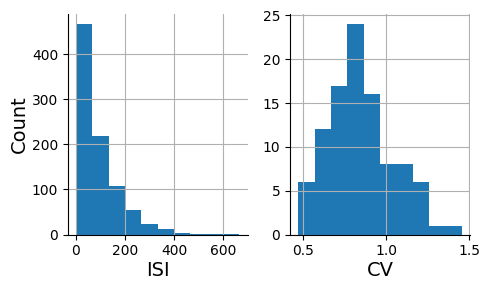

In [5]:
def plot_data(data, ax):
    pd.Series(data).hist(ax=ax)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
fig, axs = plt.subplots(1, 2, figsize=(5, 3))

plot_data(isi_tensor[isi_tensor > 0].float(), axs[0])
plot_data(cv_tensor, axs[1])
axs[0].set_ylabel("Count", fontsize=14, labelpad=2)
axs[0].set_xlabel("ISI", fontsize=14, labelpad=2)
axs[1].set_xlabel("CV", fontsize=14, labelpad=2)
fig.tight_layout()
# Note: You can calculate the firing rate (Hz) by m 